In [1]:
import numpy as np
import random

import jax
import jax.numpy as jnp

import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from flax import linen as nn

2025-06-10 17:27:26.625246: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-10 17:27:26.636677: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-10 17:27:26.640214: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [80]:
# Generate 100 sine functions with different a,b,c parameters and random noise
def sine(a,b,c,x):
    return a * np.sin(b * x + c)

x_data = np.arange(0,10,0.001)
a_list = np.linspace(0.1,10,100)
b_list = np.linspace(0.1,6,100)
c_list = np.linspace(0,5,100)

y_data = [0] * len(a_list)
signal = [0] * len(a_list)
dict = {}
for i in range(0,len(a_list)):
    random.shuffle(b_list)
    random.shuffle(c_list)
    if i <= 60:
        y_data[i] = sine(a_list[i], b_list[i], c_list[i], x_data) + np.random.normal(-a_list[i],a_list[i],len(x_data))
        signal[i] = 1   #boolean: 1 = there is a sine signal, 0 = just noise
    else:       
        y_data[i] = np.random.normal(-a_list[i],a_list[i],len(x_data))  # 40 noise datasets with no signal

y_data = np.array(y_data).transpose()
for n in range(0,len(x_data)):
    dict.update({str(x_data[n]): y_data[n]})

dict.update({'signal': signal})

df = pd.DataFrame(dict)
df = df.sample(frac=1)  # shuffle data

,0.0,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009000000000000001,...,9.991,9.992,9.993,9.994,9.995000000000001,9.996,9.997,9.998,9.999,signal
2,-0.152951,0.553188,-0.152643,-0.091181,0.226388,-0.728697,-0.394981,0.027089,-0.723093,-0.040088,...,0.427903,-0.418065,-0.693942,-0.015759,-0.047783,-0.115513,-0.412795,-0.199492,-0.149113,1
47,-7.531462,-10.118230,-3.603820,-10.485057,-1.743165,-3.327946,-0.766378,-9.142339,-6.998125,-8.685790,...,-13.759175,-9.174862,-10.745229,1.611310,-12.130870,-10.583061,-11.033974,-11.882825,-11.035242,1
84,-15.783312,-1.171227,3.405269,-23.785730,-10.026495,-11.734233,-6.789234,-19.600604,-8.914539,-13.937095,...,-4.891923,-16.152396,7.500231,-20.671426,-12.195018,-11.932746,-11.198955,-17.556481,-17.044663,0
19,3.809260,0.714640,0.054767,0.320018,5.276703,0.467950,-2.584820,-0.536115,1.854848,1.502149,...,-1.945203,-4.964696,-3.471886,-4.081623,-3.634814,0.068534,-9.527633,-6.500975,-5.006756,1
41,2.763059,3.614481,4.675290,-1.831451,5.544635,7.747778,-3.293475,4.622670,2.071698,4.346527,...,-6.720540,-3.169100,1.358938,2.374360,2.694479,4.473779,3.641315,-1.145549,-0.419339,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,-11.647650,-10.273684,-9.338468,5.916812,-10.482992,-11.772546,-10.295895,-10.757959,-12.990176,-16.945785,...,-12.802422,0.118451,-12.680563,2.388281,-3.932363,-6.975437,-29.868877,-8.961670,-12.108014,0
36,-8.184858,4.751470,-2.570510,2.535791,-5.301825,-2.151452,2.850468,-2.931911,-1.055392,-6.022213,...,-3.681776,2.565146,-0.247046,0.248086,-3.863478,0.145704,3.054927,-3.119906,-2.688333,1
12,0.410454,-1.373873,-0.930613,1.282415,0.256533,2.404939,0.883385,0.232339,1.147076,-1.893320,...,0.751254,-0.776639,-0.672417,-1.881973,-0.210638,-1.955313,1.755373,-0.886262,-0.693327,1
38,-1.464148,5.074095,-7.695747,-4.193519,5.416338,-5.226085,-0.517410,0.566035,-2.452787,-1.792106,...,5.088836,-1.327573,5.603441,-4.392751,0.508591,1.877869,-0.772004,-1.643210,8.458249,1


In [81]:
dfX = df.drop('signal',axis=1)
X = np.array(dfX)

n_classes = 2   # there is or isn't a sine signal

y = np.array(df['signal'])

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
transformer = StandardScaler()
X = transformer.fit_transform(X)

In [84]:
m = X.shape[0]
test_frac = 0.2
test_sel = np.random.choice([True, False], size=m, p=[test_frac, 1-test_frac])
random.shuffle(test_sel)
X_tst = X[test_sel]
X_train = X[~test_sel]

y_tst = y[test_sel]
y_train = y[~test_sel]

In [86]:
X_train = jnp.array(X_train)
X_tst = jnp.array(X_tst)
y_train = jnp.array(y_train)
y_tst = jnp.array(y_tst)

In [88]:
batch_size = 20    
n_batches = X_train.shape[0] // batch_size

X_train = X_train[:n_batches * batch_size].reshape((n_batches, batch_size, *X_train.shape[1:]))
y_train = y_train[:n_batches * batch_size].reshape((n_batches, batch_size, *y_train.shape[1:]))

((3, 20, 10000), (3, 20))

In [89]:
n_classes = 2

class DenseClassifier(nn.Module):
    @nn.compact
    def __call__(self, x):
        x = nn.Dense(10)(x)
        x = nn.relu(x)
        x = nn.Dense(10)(x)
        x = nn.relu(x)
        x = nn.Dense(n_classes)(x)
        return x

In [90]:
dummy_input = jnp.ones((X_tst.shape[0], len(x_data)))
dnn = DenseClassifier()
print(dnn.tabulate(jax.random.PRNGKey(0), dummy_input))


                            DenseClassifier Summary                             
┏━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃ path    ┃ module         ┃ inputs          ┃ outputs        ┃ params         ┃
┡━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│         │ DenseClassifi… │ float32[27,100… │ float32[27,2]  │                │
├─────────┼────────────────┼─────────────────┼────────────────┼────────────────┤
│ Dense_0 │ Dense          │ float32[27,100… │ float32[27,10] │ bias:          │
│         │                │                 │                │ float32[10]    │
│         │                │                 │                │ kernel:        │
│         │                │                 │                │ float32[10000… │
│         │                │                 │                │                │
│         │                │                 │                │ 100,010 (400.0 │
│         │                

In [91]:
from clu import metrics
from flax.training import train_state
from flax import struct
import optax

In [92]:
@struct.dataclass
class Metrics(metrics.Collection):
    accuracy: metrics.Accuracy
    loss: metrics.Average.from_output('loss')

class TrainState(train_state.TrainState):
   metrics: Metrics

In [93]:
def create_train_state(model, rng, learning_rate):
    params = model.init(rng, dummy_input)['params']
    tx = optax.adam(learning_rate)
    return TrainState.create(
        apply_fn=model.apply, params=params, tx=tx,
        metrics=Metrics.empty())

In [94]:
# What does a step do
@jax.jit
def train_step(state, batch, label):
  def loss_fn(params):
    logits = state.apply_fn({'params': params}, batch)
    loss = optax.softmax_cross_entropy_with_integer_labels(
        logits=logits, labels=label).mean()
    return loss
  grad_fn = jax.grad(loss_fn)
  grads = grad_fn(state.params)
  state = state.apply_gradients(grads=grads)
  return state

In [95]:
# For computing accuracy
@jax.jit
def compute_metrics(*, state, batch, label):
    logits = state.apply_fn({'params': state.params}, batch)
    loss = optax.softmax_cross_entropy_with_integer_labels(
        logits=logits, labels=label).mean()
    metric_updates = state.metrics.single_from_model_output(
        logits=logits, labels=label, loss=loss)
    metrics = state.metrics.merge(metric_updates)
    state = state.replace(metrics=metrics)
    return state

In [96]:
init_rng = jax.random.PRNGKey(0)

learning_rate = 0.01

state = create_train_state(dnn, init_rng, learning_rate)
del init_rng  # Must not be used anymore.

In [97]:
metrics_history = {'train_loss': [],
                   'train_accuracy': [],
                   'test_loss': [],
                   'test_accuracy': []}

In [98]:
n_epochs = 50

In [99]:
step = 0

for _ in range(n_epochs):
  for batch, label in zip(X_train, y_train):

    # Run optimization steps over training batches and compute batch metrics
    state = train_step(state, batch, label) # get updated train state (which contains the updated parameters)
    state = compute_metrics(state=state, batch=batch, label=label) # aggregate batch metrics

    if (step+1) % n_batches == 0: # one training epoch has passed
      for metric,value in state.metrics.compute().items(): # compute metrics
        metrics_history[f'train_{metric}'].append(value) # record metrics
      state = state.replace(metrics=state.metrics.empty()) # reset train_metrics for next training epoch

      # Compute metrics on the test set after each training epoch
      test_state = state
      test_state = compute_metrics(state=test_state, batch=X_tst, label=y_tst)

      for metric,value in test_state.metrics.compute().items():
        metrics_history[f'test_{metric}'].append(value)

      print(f"train epoch: {(step+1) // n_batches}, "
            f"loss: {metrics_history['train_loss'][-1]}, "
            f"accuracy: {metrics_history['train_accuracy'][-1] * 100}")
      print(f"test epoch: {(step+1) // n_batches}, "
            f"loss: {metrics_history['test_loss'][-1]}, "
            f"accuracy: {metrics_history['test_accuracy'][-1] * 100}")
    step += 1

train epoch: 1, loss: 4.8940582275390625, accuracy: 75.00000762939453
test epoch: 1, loss: 3.580986261367798, accuracy: 92.59259033203125
train epoch: 2, loss: 1.9306715726852417, accuracy: 95.00000762939453
test epoch: 2, loss: 2.8683598041534424, accuracy: 92.59259033203125
train epoch: 3, loss: 0.3369339406490326, accuracy: 96.66667175292969
test epoch: 3, loss: 1.0663793087005615, accuracy: 92.59259033203125
train epoch: 4, loss: 0.04707931727170944, accuracy: 98.33334350585938
test epoch: 4, loss: 0.3307376503944397, accuracy: 96.29629516601562
train epoch: 5, loss: 0.013178959488868713, accuracy: 100.0
test epoch: 5, loss: 0.7620483040809631, accuracy: 96.29629516601562
train epoch: 6, loss: 0.0118976179510355, accuracy: 100.0
test epoch: 6, loss: 1.1085386276245117, accuracy: 96.29629516601562
train epoch: 7, loss: 0.010788939893245697, accuracy: 100.0
test epoch: 7, loss: 1.4089460372924805, accuracy: 92.59259033203125
train epoch: 8, loss: 0.010048434138298035, accuracy: 100.0

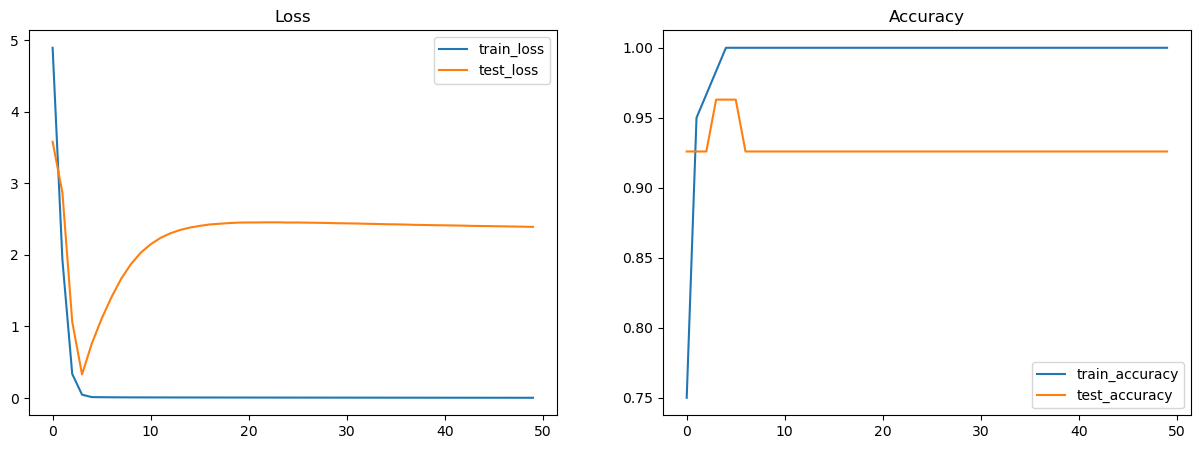

<Figure size 640x480 with 0 Axes>

In [100]:
# Plot loss and accuracy in subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.set_title('Loss')
ax2.set_title('Accuracy')
for dataset in ('train','test'):
  ax1.plot(metrics_history[f'{dataset}_loss'], label=f'{dataset}_loss')
  ax2.plot(metrics_history[f'{dataset}_accuracy'], label=f'{dataset}_accuracy')
ax1.legend()
ax2.legend()
plt.show()
plt.clf()

# 2: Is your trained model confident that any of the stars in your test set are part of M4?

Yes, as seen above, my model is very confident that many of the stars are in M4, since there is a large spike at 4 on the plot above.

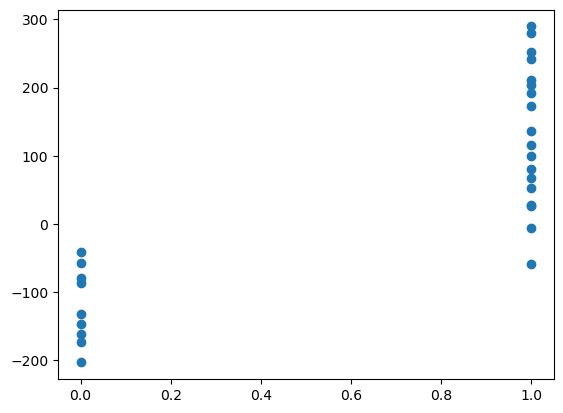

In [101]:
outputs = state.apply_fn({'params': state.params}, X_tst)
plt.scatter(df[test_sel]['signal'], jnp.diff(outputs, axis=1))

In [102]:
confident_pos = jnp.where(jnp.diff(outputs, axis=1) > 0)[0]
confident_df = df[test_sel].iloc[confident_pos]
confident_df

,0.0,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009000000000000001,...,9.991,9.992,9.993,9.994,9.995000000000001,9.996,9.997,9.998,9.999,signal
2,-0.152951,0.553188,-0.152643,-0.091181,0.226388,-0.728697,-0.394981,0.027089,-0.723093,-0.040088,...,0.427903,-0.418065,-0.693942,-0.015759,-0.047783,-0.115513,-0.412795,-0.199492,-0.149113,1
47,-7.531462,-10.118230,-3.603820,-10.485057,-1.743165,-3.327946,-0.766378,-9.142339,-6.998125,-8.685790,...,-13.759175,-9.174862,-10.745229,1.611310,-12.130870,-10.583061,-11.033974,-11.882825,-11.035242,1
30,-0.796109,-7.192974,-9.123081,-2.149377,-7.864152,-4.722505,-6.710837,-9.444884,-7.492382,-10.365978,...,-4.036354,-7.750961,-2.919690,4.533930,-7.647752,-5.326457,-6.187371,-6.976154,-8.845342,1
32,-4.925795,-6.287844,1.634295,-1.160241,0.988503,-7.181444,-6.880505,-10.221657,3.770449,3.426544,...,-6.068837,-10.086460,-8.015780,-4.261888,-6.557352,-3.451558,-4.765518,-4.829782,-5.414797,1
20,-3.127833,-0.613581,-5.692040,-0.957327,-0.803597,-6.469845,-3.704495,0.411627,-3.519150,-6.158684,...,-2.667764,-2.170903,0.302038,-2.460394,-1.145694,1.399946,-0.760980,-0.706823,-0.800029,1
22,0.550933,2.804421,0.341199,2.000472,-0.849036,0.116849,1.525837,-2.806099,-3.506062,-4.427832,...,-1.281336,-4.553983,-6.636711,-4.188242,-6.589831,-4.860495,-5.756559,0.340631,-0.868116,1
16,-4.277837,-4.683595,-2.990643,-1.144616,-2.638842,-3.577116,-4.330189,-2.685138,-4.029575,-6.574798,...,-3.080420,-3.514721,-1.568131,-3.217016,-2.399705,-2.611177,-5.369841,-3.267057,-3.419539,1
7,-1.519029,-0.203397,-0.460424,0.853160,-0.417702,0.404275,0.160132,-0.110192,-0.696470,-1.641836,...,-2.061600,-0.458139,-2.931316,-1.232621,0.342551,-1.295849,0.192434,-2.600883,-1.974087,1
17,-2.492072,0.461602,-6.531211,-2.539426,-6.705796,-2.769929,-2.982739,-2.137951,-2.781218,-5.062013,...,-4.184609,-1.843613,-3.279389,-6.072675,-4.160551,-2.945315,-5.031063,-5.404869,-3.016518,1
37,1.965613,-1.672939,-2.152633,-1.881528,-0.010965,3.031576,0.222596,-5.635673,-2.465287,-8.664931,...,-4.198371,-8.471199,1.288444,-4.809561,-8.962514,-5.853540,-6.791096,-3.731281,-7.850234,1


In [103]:
confident_neg = jnp.where(jnp.diff(outputs, axis=1) < 0)[0]
confident_ndf = df[test_sel].iloc[confident_neg]
confident_ndf

,0.0,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009000000000000001,...,9.991,9.992,9.993,9.994,9.995000000000001,9.996,9.997,9.998,9.999,signal
84,-15.783312,-1.171227,3.405269,-23.785730,-10.026495,-11.734233,-6.789234,-19.600604,-8.914539,-13.937095,...,-4.891923,-16.152396,7.500231,-20.671426,-12.195018,-11.932746,-11.198955,-17.556481,-17.044663,0
70,-2.770119,-11.920839,-20.000974,-11.264429,-14.294305,4.663332,-12.202707,5.335514,1.096527,-17.429067,...,-3.943685,-3.139265,-3.935931,-0.649119,-16.811275,-16.205260,-11.011530,-32.033508,1.385437,0
61,-6.602608,-7.496710,-12.038939,-7.541501,-4.614376,-6.980056,-4.438350,-3.704406,-11.937346,-7.077283,...,-4.224172,3.106983,6.591694,-9.950888,3.439281,-9.210852,-7.930041,-5.662748,-17.474740,0
96,-14.735769,-14.666532,-3.474431,-23.940174,-11.472021,-15.902599,-10.943061,-12.697195,-1.959852,-1.888022,...,-27.600772,-12.340150,-15.298790,-9.284908,-17.207994,-24.550094,-7.483569,-19.498572,-19.015713,0
58,-17.947498,-12.635968,-11.705425,-14.824594,-10.615699,-12.268991,-11.702197,-6.098317,-21.618442,-24.098565,...,-8.772043,-4.112921,-5.085724,-3.396744,-3.581035,-3.151080,-4.952062,-7.066843,-3.861342,1
72,-9.373061,-15.930880,-14.029489,-2.616107,-17.360911,-1.397353,-5.931645,1.905558,9.334639,-10.974499,...,-1.546013,-14.474848,4.704564,-4.015844,-3.809484,-8.412572,-12.240280,-1.897756,-7.050012,0
63,-11.923663,8.729180,-8.475404,2.107216,-7.709443,3.261245,-9.764866,-12.582369,4.604737,-17.246958,...,-9.951756,-2.264413,-1.135099,-10.032088,-0.894050,-5.800735,1.656919,-5.951659,-6.111194,0
87,-17.457380,-13.417035,-9.483090,-11.289101,-8.305295,-18.380910,-10.867145,-7.564201,-12.301639,-20.900203,...,-7.584213,-4.234119,-11.185587,-2.731674,-3.602363,-11.075268,-13.193540,6.104429,-3.793008,0
93,-23.345219,0.875391,1.615877,12.199769,-13.439114,-18.867669,-18.038696,-8.771672,0.356474,-9.282501,...,-9.029085,-6.535329,-13.750071,-5.826794,-14.286807,-12.650914,3.211767,-20.377349,-21.665610,0
59,5.824261,5.291926,-6.378338,9.578696,0.311338,-15.341639,-2.524303,-3.285994,0.306009,-0.260861,...,-9.768355,-16.188431,-10.949636,-7.622670,-5.329207,-2.491419,-1.500022,-10.044506,-18.071289,1


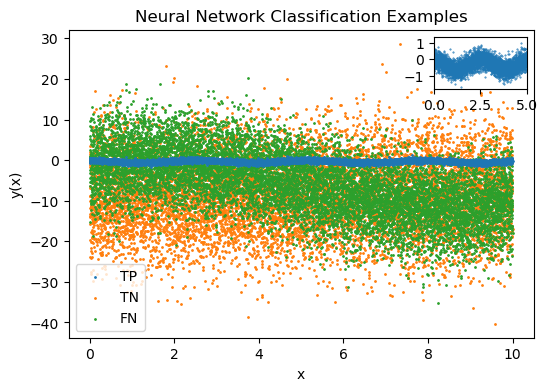

In [126]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

true_pos = confident_df.iloc[0].to_numpy()[:-1]
true_neg = confident_ndf.iloc[0].to_numpy()[:-1]
false_neg = confident_ndf.iloc[9].to_numpy()[:-1]

fig, ax = plt.subplots(figsize=(6, 4))

ax.scatter(x_data, true_pos, label='TP', zorder=3, s=1)
#plt.scatter(x_data, confident_df(84), label='FP')
ax.scatter(x_data, true_neg, label='TN', s=1)
ax.scatter(x_data, false_neg, label='FN', s=1)

sub_ax = inset_axes(parent_axes=ax, width="20%", height="17%")
sub_ax.scatter(x_data, true_pos, s=0.2)
sub_ax.set_xlim(0,5)

ax.set_xlabel('x')
ax.set_ylabel('y(x)')
ax.set_title('Neural Network Classification Examples')
ax.legend(loc = 'lower left');